# Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading Dataset 

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
pd.options.display.max_columns = None

#  Display Top 5 Rows of The Dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check Last 5 Rows of The Dataset

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(284807, 31)

In [7]:
print ('number of rows',data.shape[0]),
print ('number of columns',data.shape[1])

number of rows 284807
number of columns 31


In [8]:
data.value_counts('Class')

Class
0    284315
1       492
dtype: int64

# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#  Calculate summary statistics

In [10]:
summary_statistics = data.describe()
summary_statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check Null Values In The Dataset

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


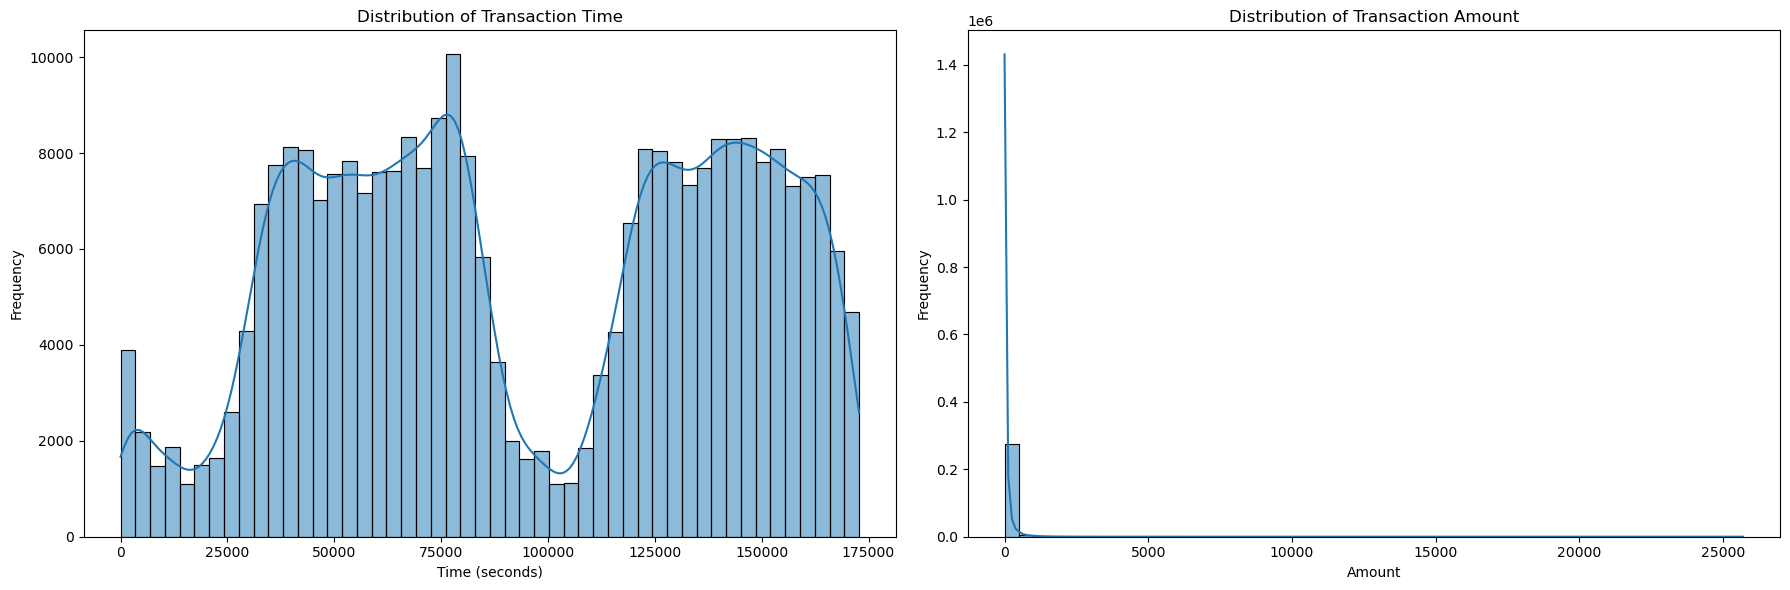

In [13]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for 'Time' feature
sns.histplot(data['Time'], bins=50, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Frequency')

# Histogram for 'Amount' feature
sns.histplot(data['Amount'], bins=50, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# The histograms for the 'Time' and 'Amount' features show the following:

Transaction Time: The distribution of transaction times shows some periodic patterns, which could be related to daily or weekly cycles in transaction frequency. This is common in financial transaction data, where activity can vary significantly depending on the time of day or week.

Transaction Amount: Most transactions are of lower amounts, with the frequency rapidly decreasing as the amount increases. This long-tailed distribution is typical in financial datasets, where small transactions are common and large transactions are relatively rare.

The 'Amount' feature shows a significant range and might need scaling or normalization for certain types of analysis or modeling.

# Box Plot

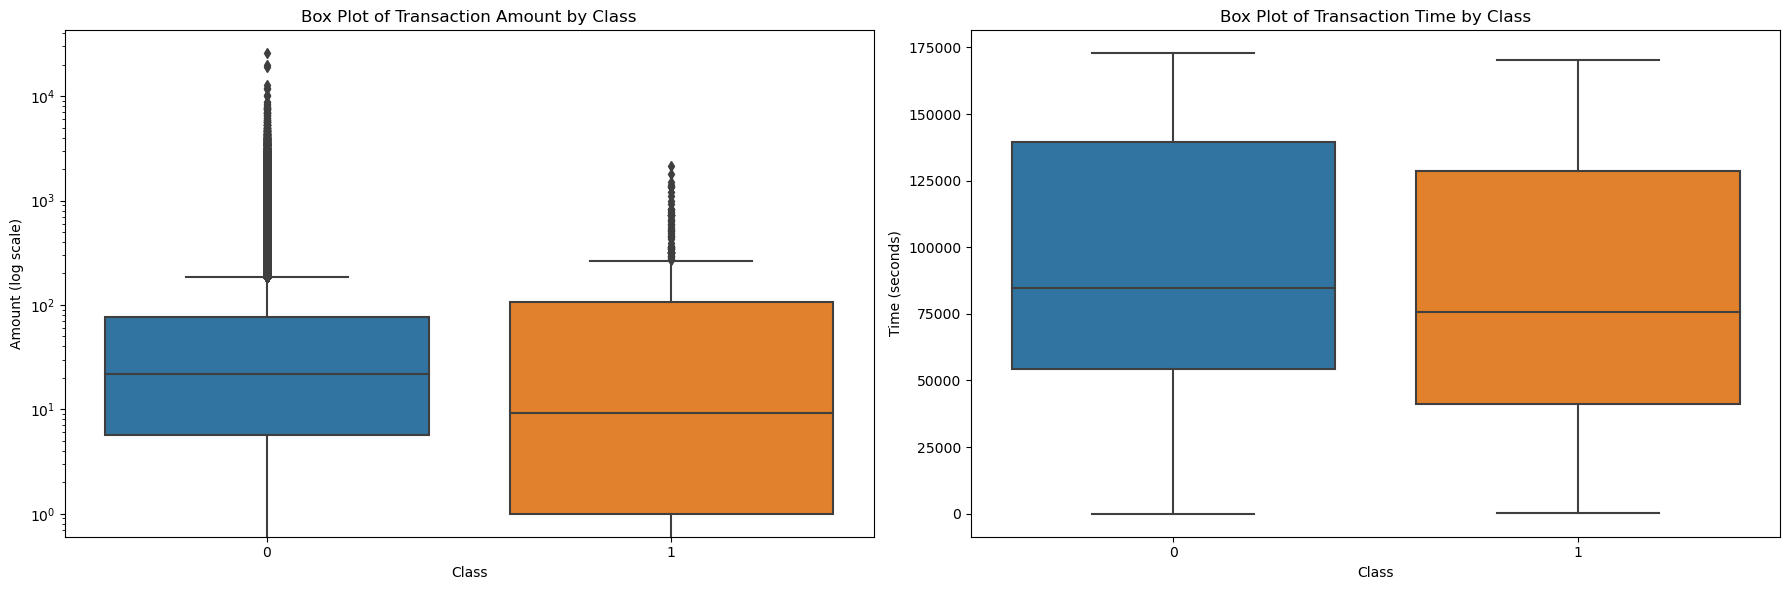

In [14]:
# Creating subplots for box plots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Box plot for 'Amount' by 'Class'
sns.boxplot(x='Class', y='Amount', data=data, ax=ax[0])
ax[0].set_title('Box Plot of Transaction Amount by Class')
ax[0].set_yscale('log')  # Using log scale due to wide range of 'Amount'
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Amount (log scale)')

# Box plot for 'Time' by 'Class'
sns.boxplot(x='Class', y='Time', data=data, ax=ax[1])
ax[1].set_title('Box Plot of Transaction Time by Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Time (seconds)')

# Adjust layout
plt.tight_layout()
plt.show()

# The box plots provide insights into how the 'Amount' and 'Time' features vary between fraudulent and non-fraudulent transactions:

Transaction Amount by Class:
For non-fraudulent transactions (Class 0), the 'Amount' tends to be smaller and has a narrower interquartile range.
Fraudulent transactions (Class 1) show a wider range of 'Amount', with some outliers indicating very high transaction amounts. However, the median is still relatively low, suggesting that many fraudulent transactions are of lower amounts.
Transaction Time by Class:
The distribution of transaction times for both classes appears quite similar.
There's no immediately apparent difference in the distribution of transaction times between fraudulent and non-fraudulent transactions.

In [15]:
data.shape

(284807, 31)

# Checking and Removing Duplicates Values

In [16]:
data.duplicated().any()

True

In [17]:
data=data.drop_duplicates()

In [18]:
data.shape

(283726, 31)

In [19]:
data.shape

(283726, 31)

#  Imbalanced Data

In [20]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [21]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

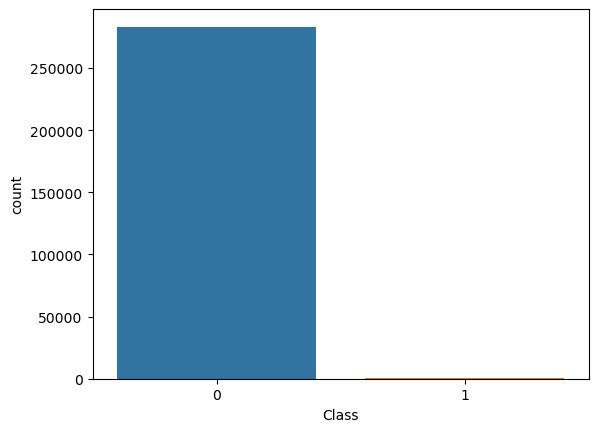

In [22]:
sns.countplot(x='Class', data=data)

#  A few observations:

The dataset is likely highly imbalanced, with a much higher proportion of non-fraudulent transactions compared to fraudulent ones.

The V1-V28 features are the result of PCA, so they are already transformed and standardized

# Plotting the correlation Matrix

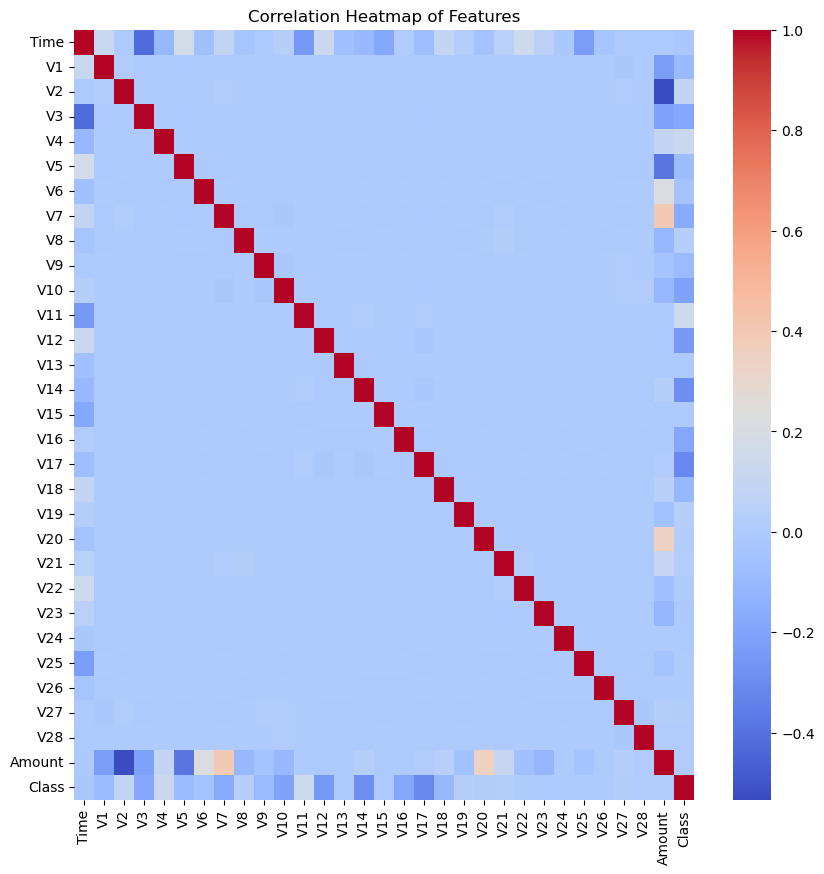

In [23]:
### The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict 
### what are the features that are most relevant for the prediction 

# Calculating the correlation matrix
corr_matrix = data.corr()

# Creating a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Correlation Heatmap of Features')
plt.show()

# The correlation heatmap provides a visual representation of the relationships between different features in the dataset:

Most of the V1-V28 features, which are results of PCA, show little to no correlation with each other. This is expected, as one of the purposes of PCA is to orthogonalize the components.
The 'Class' variable shows varying degrees of correlation with some of the V features, which indicates that certain features might be more informative in distinguishing fraudulent transactions.
The 'Time' and 'Amount' features do not exhibit strong correlations with the other features or with the 'Class' variable, suggesting that they might not be as discriminative on their own for identifying fraud.

# Data preprocessing using StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [26]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [27]:
data = data.drop(['Time'],axis=1)

In [28]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [29]:
data.shape

(283726, 30)

# store feature matrix in X and response(Target) vector in y

In [30]:
X = data.drop(['Class'],axis=1)
y = data['Class']

# Splitting Datasets into the Training and Testing set and Test sets 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# checking the model before balancing the data

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9991717477883904

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [39]:
precision_score(y_test,y_pred)

0.8909090909090909

In [40]:
recall_score(y_test,y_pred)

0.5444444444444444

In [41]:
f1_score(y_test,y_pred)

0.6758620689655171

# Handeling Imbalanced Dataset With
*undersampling

*oversampling

# Undersampling

In [42]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [43]:
normal.shape

(283253, 30)

In [44]:
fraud.shape

(473, 30)

In [45]:
normal_sample = normal.sample(n=473)

In [46]:
normal_sample.shape

(473, 30)

In [47]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [48]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [49]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.354662,0.132957,-0.071744,-2.143004,3.883435,3.105698,0.333710,0.730099,-0.246574,-0.455095,-0.098794,-0.143711,-0.488615,0.100646,-0.020828,-0.095736,-0.682269,-0.933084,-0.512096,0.015409,-0.412867,-1.043888,-0.421561,0.711301,0.606336,0.241368,-0.003143,-0.170308,-0.349373,0
1,-4.302857,0.302159,-0.529025,-2.019905,-1.192226,-1.387707,-0.720143,1.731565,0.843812,-1.620065,-1.720628,0.493026,-0.904640,0.986727,-0.615755,0.752453,0.174009,-0.679340,-0.658198,-0.212809,-0.463626,-1.645716,-0.671853,-0.061020,0.450354,0.163869,0.206833,-0.307753,-0.100450,0
2,1.155640,0.024536,0.103980,1.133255,0.126672,0.511264,-0.125743,0.245990,0.268762,0.078942,0.331345,0.319737,-1.356944,0.474029,-0.604620,-0.265815,-0.164975,-0.101865,0.187467,-0.223264,-0.105569,-0.177869,-0.150600,-0.681946,0.679613,-0.284119,0.025554,-0.002588,-0.291346,0
3,-1.377614,0.701378,1.810181,-0.638219,-1.038194,0.272141,-0.535654,-0.003185,-1.581709,0.073010,0.683985,-0.564623,-1.998152,0.859392,0.127089,-0.898043,-0.084655,1.905331,-2.013207,-0.970350,0.699299,-0.244959,-0.089764,0.117588,0.320024,-0.320397,0.009714,-0.011530,-0.194261,0
4,-0.475903,0.874898,0.706284,0.009204,1.283053,0.954565,0.602312,0.281024,1.506483,-1.973749,0.441965,-1.996807,1.462914,-0.162637,-1.919302,-1.414811,2.754166,-1.610653,-1.008344,-0.254601,-0.417256,-0.510007,-0.037952,-1.169961,-0.490148,0.123782,0.158684,0.157962,-0.325371,0


In [50]:
X = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log = LogisticRegression()

In [54]:
log.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred1 = log.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
training_data_test = log.predict(X_train)

In [58]:
accuracy_score(y_train,training_data_test)

0.9563492063492064

In [59]:
accuracy_score(y_test,y_pred1)

0.9263157894736842

In [60]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
precision_score(y_test,y_pred1)

0.9489795918367347

In [62]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [63]:
f1_score(y_test,y_pred1)

0.9300000000000002

# Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Initialize the DecisionTreeClassifier with max_depth
dt_pruned = DecisionTreeClassifier(max_depth=5)  # You can adjust the max_depth value
# Fit the model
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [66]:
y_pred_pruned = dt_pruned.predict(X_test)

In [67]:
training_data_test1 = log.predict(X_train)

In [68]:
accuracy_score(y_train,training_data_test1)

0.9563492063492064

In [69]:
accuracy_score(y_test,y_pred_pruned)

0.8947368421052632

In [70]:
precision_score(y_test,y_pred_pruned)

0.9270833333333334

In [71]:
recall_score(y_test,y_pred_pruned)

0.8725490196078431

In [72]:
f1_score(y_test,y_pred_pruned)

0.898989898989899

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()

In [75]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred3 = rf.predict(X_test)

In [77]:
training_data_test2 = log.predict(X_train)

In [78]:
accuracy_score(y_train,training_data_test2)

0.9563492063492064

In [79]:
accuracy_score(y_test,y_pred3)

0.9263157894736842

In [80]:
precision_score(y_test,y_pred3)

0.9489795918367347

In [81]:
recall_score(y_test,y_pred3)

0.9117647058823529

In [82]:
f1_score(y_test,y_pred3)

0.9300000000000002

In [83]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred_pruned)*100,accuracy_score(y_test,y_pred3)*100]})

In [84]:
final_data

,Models,ACC
0,LR,92.631579
1,DT,89.473684
2,RF,92.631579


<Axes: xlabel='Models', ylabel='ACC'>

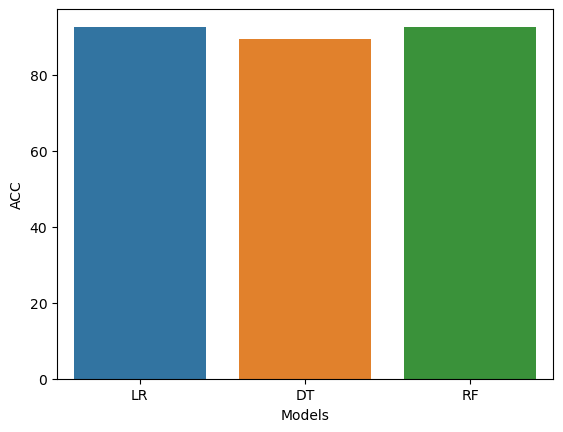

In [85]:
sns.barplot(x='Models', y='ACC', data=final_data)

# Oversampling

In [86]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [87]:
X.shape

(283726, 29)

In [88]:
y.shape

(283726,)

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [91]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# LogisticRegression 

In [93]:
log = LogisticRegression()

In [94]:
log.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred1 = log.predict(X_test)

In [96]:
acc_train_data = log.predict(X_train)

In [97]:
accuracy_score(y_train,acc_train_data)

0.9445966937626323

In [98]:
accuracy_score(y_test,y_pred1)

0.9451819032320701

In [99]:
precision_score(y_test,y_pred1)

0.972522959755096

In [100]:
recall_score(y_test,y_pred1)

0.9166241489118387

In [101]:
f1_score(y_test,y_pred1)

0.9437465469926004

# Decision Tree Classifier 

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
ds = DecisionTreeClassifier(max_depth=5)

In [104]:
ds.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [105]:
y_pred2 = ds.predict(X_test)

In [106]:
acc_train_data1 = log.predict(X_train)

In [107]:
accuracy_score(y_train,acc_train_data1)

0.9445966937626323

In [108]:
accuracy_score(y_test,y_pred2)

0.9518455102292986

In [109]:
precision_score(y_test,y_pred2)

0.9558382569507283

In [110]:
recall_score(y_test,y_pred2)

0.9477999261070744

In [111]:
f1_score(y_test,y_pred2)

0.9518021201413428

# RandomForestClassifier 

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [113]:
rc = RandomForestClassifier()

In [114]:
rc.fit(X_train,y_train) 

RandomForestClassifier()

In [115]:
 y_pred3 = rc.predict(X_test)

In [116]:
acc_train_data2 = log.predict(X_train)

In [117]:
accuracy_score(y_train,acc_train_data2)

0.9445966937626323

In [118]:
accuracy_score(y_test,y_pred3)

0.9999029143351397

In [119]:
precision_score(y_test,y_pred3)

0.999806508355321

In [120]:
recall_score(y_test,y_pred3)

1.0

In [121]:
f1_score(y_test,y_pred3)

0.9999032448170009

In [122]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred3)

In [123]:
# Print the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc}")

AUC-ROC Score: 0.9999025910773427


In [124]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred3)*100]})

In [125]:
final_data

,Models,ACC
0,LR,94.518190
1,DT,95.184551
2,RF,99.990291


<Axes: xlabel='Models', ylabel='ACC'>

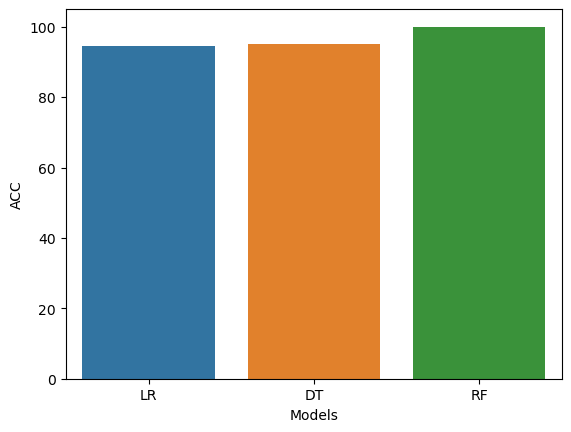

In [126]:
sns.barplot(x='Models', y='ACC', data=final_data)

# save the model 

In [127]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [128]:
import joblib

In [129]:
joblib.dump(rf1,'credit_card_mdl')

['credit_card_mdl']

In [130]:
model=joblib.load("credit_card_mdl")

In [131]:
pred =model.predict([[-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964]])

C:\New folder\anaconda files\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [132]:
if pred==0:
    print("Normal Transaction")
else:
    print("Fraudlant Transaction")

Normal Transaction


In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('credit_card_mdl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )